In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [95]:
conda install pandoc

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# NYU Career Outcomes 
## Class of 2023
### Introduction
This notebook will showcase data and visualizations of the career and life outcomes of 2023 NYU Graduates including both undergraduate and graduate students.

In [35]:
# load csv as df
df = pd.read_csv('wasserman_data.csv')

### Exploratory Data Analysis

In [36]:
# fix typo in Student ID col
df.rename(columns={"StudnetID": "StudentID"}, inplace=True)
df.head()

,StudentID,Degree Level,School,Major Group,Gender Identity,Ethnicity,Domestic or International Status,Outcome,Have Info?,Placement Status,...,Total post-graduation job offers,Employment Timing,Annual Salary Amount,Used Wasserman Services,Continuing Education School Name,Continuing Education Degree,Continuning Education Field,City,State,Country
0,LBTS_2023_2768,Masters,Graduate School of Arts and Science,Computer Science / Data Science/ Engineering/ ...,Man,International,International,Working,Yes,Placed,...,1,Before graduation,65000.0,Yes,NaN,NaN,NaN,Arlington,Virginia,United States of America
1,LBTS_2023_9196,Bachelors,Tisch School of the Arts,Humanities,Woman,Two or More Races,Domestic,Working,Yes,Placed,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,St. Louis,Missouri,United States of America
2,LBTS_2023_7700,Masters,"Steinhardt School of Culture, Education, and H...",Education,Man,White,Domestic,Working,Yes,Placed,...,1,Within 3 months of graduation,68000.0,No,NaN,NaN,NaN,NaN,New York,United States of America
3,LBTS_2023_12502,Masters,Graduate School of Arts and Science,Humanities,Woman,White,Domestic,Working,Yes,Placed,...,None – I was not seeking any job offers,Before graduation,47000.0,Yes,NaN,NaN,NaN,New York,New York,United States of America
4,LBTS_2023_13757,Masters,"Steinhardt School of Culture, Education, and H...",Education,Woman,Black,Domestic,Working,Yes,Placed,...,1,Within 3 months of graduation,74000.0,Yes,NaN,NaN,NaN,New York,New York,United States of America


In [37]:
# look at structure of df, number of rows and columns
df.shape

(1000, 27)

In [38]:
# look at list of all columns
df.columns

Index(['StudentID', 'Degree Level', 'School', 'Major Group', 'Gender Identity',
       'Ethnicity', 'Domestic or International Status', 'Outcome',
       'Have Info?', 'Placement Status', 'Employer', 'Industry',
       'Full-time or Part-time', 'Position Type', 'Job Title', 'Job Level',
       'Promotion or Return Offer from an Internship',
       'Total post-graduation job offers', 'Employment Timing',
       'Annual Salary Amount', 'Used Wasserman Services',
       'Continuing Education School Name', 'Continuing Education Degree',
       'Continuning Education Field', 'City', 'State', 'Country'],
      dtype='object')

In [39]:
# look at data types: one numerical column, all others objects
# few cols with only 27 non-null values - continuing education
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   StudentID                                     1000 non-null   object 
 1   Degree Level                                  1000 non-null   object 
 2   School                                        1000 non-null   object 
 3   Major Group                                   1000 non-null   object 
 4   Gender Identity                               1000 non-null   object 
 5   Ethnicity                                     1000 non-null   object 
 6   Domestic or International Status              1000 non-null   object 
 7   Outcome                                       1000 non-null   object 
 8   Have Info?                                    1000 non-null   object 
 9   Placement Status                              1000 non-null   ob

# Data Cleaning
Address null values and misspellings.

### Null Values

In [40]:
# view number of null values per column
df.isnull().sum()

StudentID                                         0
Degree Level                                      0
School                                            0
Major Group                                       0
Gender Identity                                   0
Ethnicity                                         0
Domestic or International Status                  0
Outcome                                           0
Have Info?                                        0
Placement Status                                  0
Employer                                         33
Industry                                         33
Full-time or Part-time                           52
Position Type                                    33
Job Title                                        33
Job Level                                       258
Promotion or Return Offer from an Internship    276
Total post-graduation job offers                575
Employment Timing                               651
Annual Salar

#### Null Value Insights

* Based on the null value counts, we can assume that there are missing responses for employer, industry, full-time or part-time, position type, job title, used wasserman services, city, state, and country. 
* For the columns with more null values, we can assume that these fields were not applicable such as continuing education or return offers. 
* However, we might want to look in to the missing values for annual salary amount. 

### Misspellings

In [41]:
# get the number of unique values per column to see which cols might be less standardized and need cleaning
df.nunique()

StudentID                                       1000
Degree Level                                       4
School                                            12
Major Group                                       10
Gender Identity                                    4
Ethnicity                                          8
Domestic or International Status                   3
Outcome                                            5
Have Info?                                         1
Placement Status                                   3
Employer                                         649
Industry                                          31
Full-time or Part-time                             2
Position Type                                      8
Job Title                                        423
Job Level                                          4
Promotion or Return Offer from an Internship       3
Total post-graduation job offers                   5
Employment Timing                             

#### Check for Unique Values
Check cols with a lot of unique values for repeats - employers, job titles, city. 
Focus on employers and city which are more relevant to this analysis.

##### Employer Name

In [42]:
employer_unique =  df[df['Employer'].notnull()]['Employer'].unique()
# for x in sorted(employer_unique):
#     print(x)

Based on unique values, there are some duplicate answers with different formats/spellings causing them to be counted as unique. For example "Department of Education" is in unique vals twice due to a misspelling. We will need to clean the columns to address this.

In [43]:
# replace misspellings with corrections in Employer col
employer_replace_dict = {"Department of Educaton": "Department of Education", "Great Oaks Charter Schools NYC" : "Great Oaks NYC", 
                         "Mastercard Data & Services" : "Mastercard", "NYU langone health": "NYU Langone Health"}
df['Employer'] = df['Employer'].replace(employer_replace_dict)

# validate that it worked
# len(df[df['Employer'].notnull()]['Employer'].unique())

##### City

In [44]:
# checking cities for misspellings -- looks good
cities_unique =  df[df['City'].notnull()]['City'].unique()
# for x in sorted(cities_unique):
#     print(x)

Does not have repeats due to misspellings

#### Standardize Columns Insights

* We replaced misspellings in the Employer column
* We checked the cities column but did not see any repeats due to misspelling

## Demographics
### What demographics make up the data?
- Gender Identity
- Ethnicity
- Domestic or International Status
- Degree level
- Location: City, State, Country

In [45]:
# create function that will return barchart and df containing demographic percentages

def demographic_visual(col, df):
    # create gender df that groups data by gender and aggregates by count
    demog_df = df.groupby(col).count()[['StudentID']].reset_index().rename(columns={'StudentID':'Count'})
    
    # create column that calculates percent of count
    demog_df['Percent'] = demog_df['Count']/demog_df['Count'].sum()
    
    # format column to percentage
    demog_df['Percent'] = demog_df['Percent'].map('{:,.2%}'.format)
    
    # sort df by Count
    demog_df.sort_values(by='Count', ascending=False, inplace=True)

    # create horizontal bar chart with plotly express
    demogFig = px.bar(demog_df, x='Count', y=col, 
                orientation='h',
                title=col+' '+'Composition', 
                hover_data=['Percent'],
                labels = {'Count':'Number of Graduates'}, 
                color=col, 
                text=demog_df['Percent']
                )
    
    demogFig.show()
    return demog_df.reset_index(drop=True)

### Gender Composition

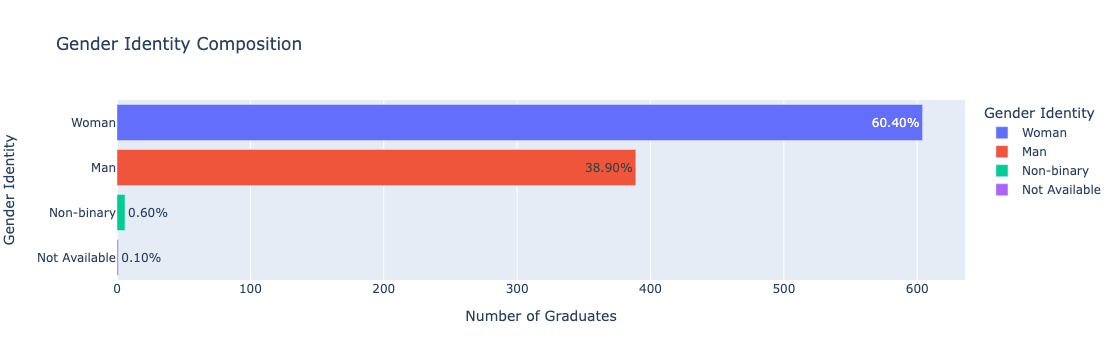

,Gender Identity,Count,Percent
0,Woman,604,60.40%
1,Man,389,38.90%
2,Non-binary,6,0.60%
3,Not Available,1,0.10%


In [49]:
# create a bar chart visualization of genders and df with stats using function
demographic_visual('Gender Identity', df)

#### Insights
1. Over half of the graduating class identified as women.
2. Male identifying graduates made up the second largest percentage of graduates.
3. Non-binary graduates were the least represented.

### Ethnicity Composition

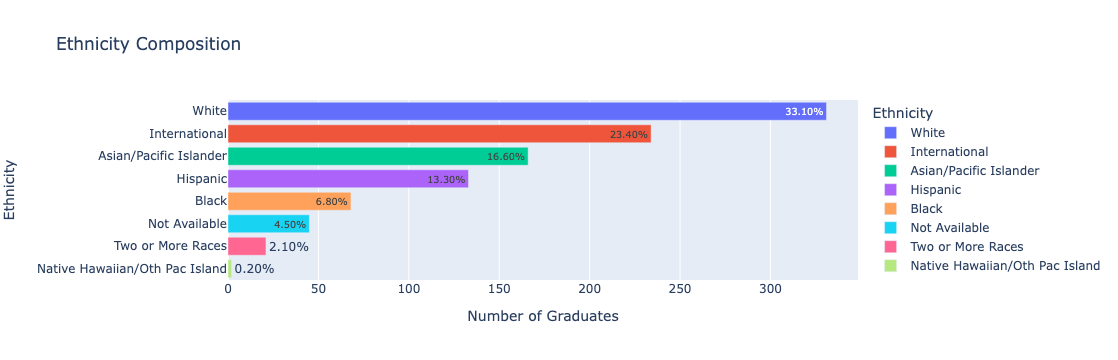

,Ethnicity,Count,Percent
0,White,331,33.10%
1,International,234,23.40%
2,Asian/Pacific Islander,166,16.60%
3,Hispanic,133,13.30%
4,Black,68,6.80%
5,Not Available,45,4.50%
6,Two or More Races,21,2.10%
7,Native Hawaiian/Oth Pac Island,2,0.20%


In [50]:
# create a bar chart visualization of ethnicities and df with stats using function
demographic_visual('Ethnicity', df)

#### Insights
1. The largest portion of graduates were white.
2. The least represented demographic was Native Hawaiin/Other Pac Island.

### Domestic or International Composition

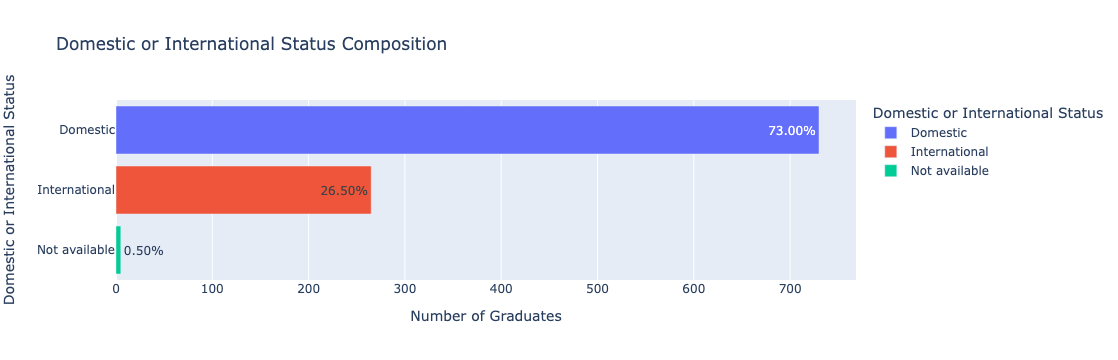

,Domestic or International Status,Count,Percent
0,Domestic,730,73.00%
1,International,265,26.50%
2,Not available,5,0.50%


In [51]:
# create a bar chart visualization of domestic/int status and df with stats using function
demographic_visual('Domestic or International Status', df)

#### Insights
1. A majority of the graduating class is domestic while nearly 27% is international. 

### Degree Level Composition

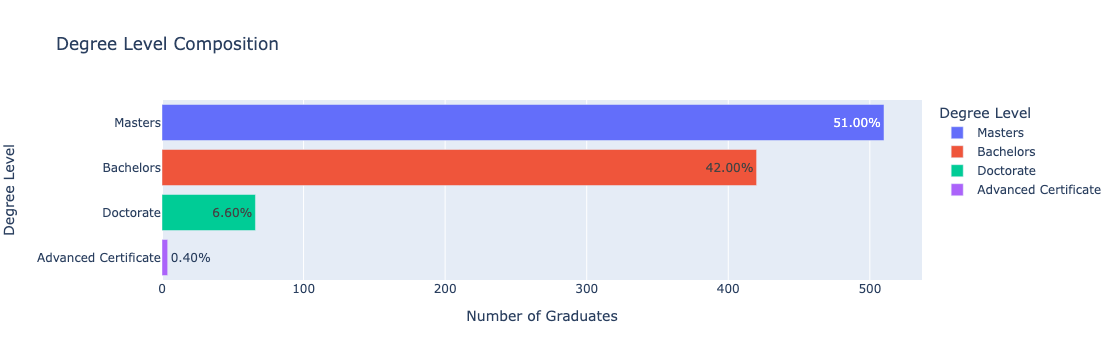

,Degree Level,Count,Percent
0,Masters,510,51.00%
1,Bachelors,420,42.00%
2,Doctorate,66,6.60%
3,Advanced Certificate,4,0.40%


In [52]:
# create a bar chart visualization of degree level and df with stats using function
demographic_visual('Degree Level', df)

#### Insights
1. Over half of the Class of 2023 graduated with a Masters degree.
2. Altogether, 58% of the graduating class obtained a graduate level degree.
3. There were only 4 Advanced Certifications received.

### Location

In order to generate a map displaying cities populated by graduates, we must load latitudinal and longitudinal data from [Simple Maps](https://simplemaps.com/data/world-cities) World Cities Database, an accurate and up-to-date database of the world's cities and towns built from authoritative sources such as the NGIA, US Geological Survey, US Census Bureau, and NASA.

We will join the Wasserman location information with this data to get the latitude and longitude of the cities which we can use to create an interactive map with plotly express.



In [53]:
# load worldcities csv  
worldcities = pd.read_csv('worldcities.csv')

# create a location df from wasserman data that can be merged with worldcities to find lat and long
location = df[['City', 'State', 'Country']]
# filter out null values
location = location[location['Country'].notnull()]

#### Joining Wasserman Location Data with World Cities

In order to merge location data with world cities, use [DataPrep library](https://docs.dataprep.ai/user_guide/clean/clean_country.html) to add a country code column to Wasserman location data to standardize Country names.

The Data Prep Library includes functions for quickly and easily cleaning and validating location data. We will use the clean_country() function to clean the location country column and standardize it in the alpha-2 country code format.

*The countries/regions supported and the regular expressions used can be found on [GitHub](https://github.com/sfu-db/dataprep/blob/develop/dataprep/clean/country_data.tsv).*



In [54]:
# install dataprep api to use clean_country() function - only run once
# conda install -c conda-forge dataprep

In [55]:
from dataprep.clean import clean_country

# add a col of country code to locations to standardize country col so that can merge with worldcities
# use clean_country function from data prep to get the alpha-2 codes for country - only run once
location = clean_country(location, "Country", output_format='alpha-2')

# rename Country_clean column to alpha-2 for clarity
location.rename(columns={'Country_clean':'alpha-2'}, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/core.py:7234: FutureWarning:

Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.



  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	963 values cleaned (100.0%)
Result contains 963 (100.0%) values in the correct format and 0 null values (0.0%)


In [56]:
# new location df containing alpha-2 codes that we can join with worldcities
location

,City,State,Country,alpha-2
0,Arlington,Virginia,United States of America,US
1,St. Louis,Missouri,United States of America,US
2,NaN,New York,United States of America,US
3,New York,New York,United States of America,US
4,New York,New York,United States of America,US
...,...,...,...,...
962,Jersey City,New Jersey,United States of America,US
963,New York,New York,United States of America,US
964,London,NaN,United Kingdom,GB
965,McLean,Virginia,United States of America,US


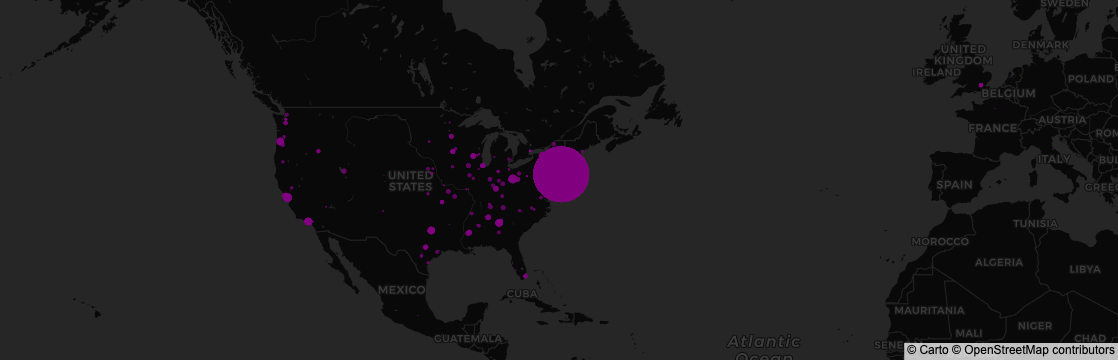

In [57]:
# join location df with worldcities df to get lat and long using left merge as we only want to keep countries in wasserman location df
merged = location.merge(worldcities, how='left', left_on=['City', 'alpha-2'], right_on=['city', 'iso2'])

# add col to df that has the value counts of cities to add as a label
# remove null values
merged['Number of Graduates'] = merged.groupby(['city']).city.transform('count')
merged = merged[merged['Number of Graduates'].notnull()]

# show map
px.scatter_mapbox(
    merged,
    lat="lat",
    lon="lng",
    hover_data=["Number of Graduates"],
    hover_name="City",
    color_discrete_sequence=['purple'],
    color_continuous_scale=px.colors.sequential.Rainbow,
    size='Number of Graduates',
    size_max=40,
).update_layout(mapbox={"style": "carto-darkmatter", "zoom": 2}, margin={"t":0,"b":0,"l":0,"r":0})

#### Insights
1. The highest concentration of graduates (677) reside in New York, New York.
2. Graduates are spread out across North America with a large portion remaining in the East.
3. Some graduates live abroad across all continents expect Oceania and South America.

## Outcomes
### How is the data spread across the 5 outcomes per degree level?
1. Working
2. Working and In School
3. Seeking Employment
4. Seeking Continuing Education
5. Not Seeking Employment or Continuing Education

 
*Since there is no data for "In School", we will not include this outcome in the charts*

In [58]:
# define a function that returns stats and pie chart for outcomes filtered on specified degree level

# assign degree type lists to variables for grad and undergrad
ug_degrees = ['Bachelors']
grad_degrees = ['Doctorate','Masters','Advanced Certificate']

def outcome_stats(degree, df):
    # filter df by degree level and groupby degree level aggregate on count
    filtered = df[df['Degree Level'].isin(degree)]
    outcomes = filtered.groupby('Outcome').count()[['StudentID']].reset_index().rename(columns={'StudentID':'Count'})
    
    # create column that calculates percent of students per outcome
    outcomes['Percent'] = outcomes['Count']/outcomes['Count'].sum()
    
    # format column from int to percentage
    outcomes['Percent'] = outcomes['Percent'].map('{:,.2%}'.format)
    
    # sort df by Count
    outcomes.sort_values(by='Count', ascending=False, inplace=True)
    outcomes = outcomes.reset_index(drop=True)

    # create pie chart visualizing dist of outcomes with title corresponding to specified degree level
    if degree == ['Bachelors']:
        fig = px.pie(outcomes, 
                 values='Count', 
                 names='Outcome', 
                 title='Undergraduate Outcomes')
    elif "Bachelors" in ''.join(degree):
        fig = px.pie(outcomes, 
                 values='Count', 
                 names='Outcome', 
                 title='Total Outcomes')
    else:
        fig = px.pie(outcomes, 
                 values='Count', 
                 names='Outcome', 
                 title='Graduate Outcomes')
        
    fig.update_layout(width=750, height=600)
    fig.show()

    return outcomes

### Undergraduate Outcomes

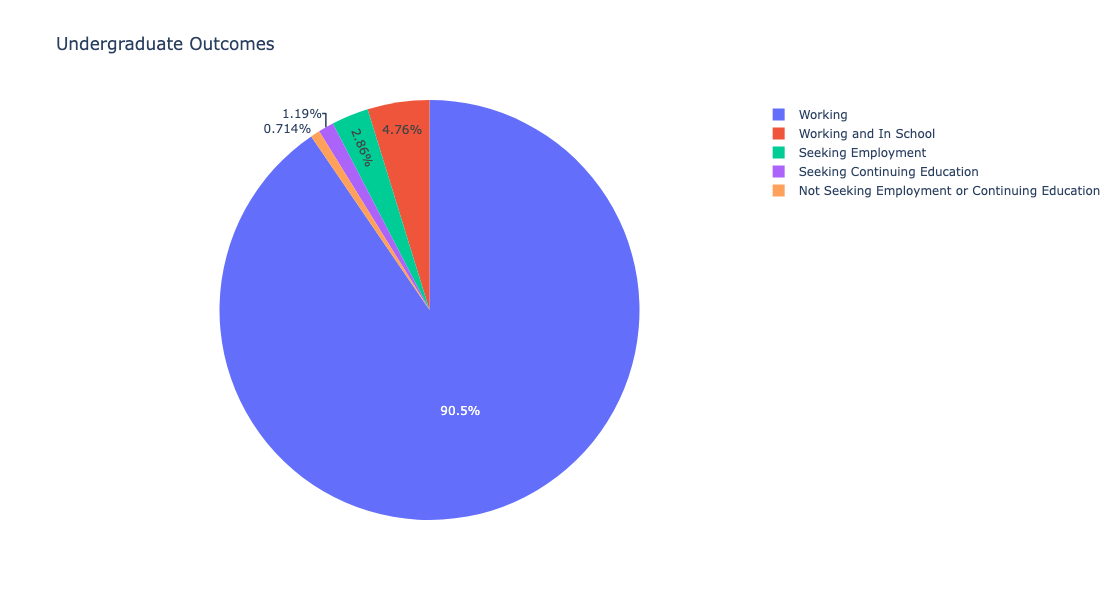

,Outcome,Count,Percent
0,Working,380,90.48%
1,Working and In School,20,4.76%
2,Seeking Employment,12,2.86%
3,Seeking Continuing Education,5,1.19%
4,Not Seeking Employment or Continuing Education,3,0.71%


In [59]:
outcome_stats(ug_degrees, df)

#### Insights
1. The majority of undergraduate students started working after graduation.
2. The other 9.52% of undergraduate grads are spread across the other outcomes.

### Graduate Outcomes

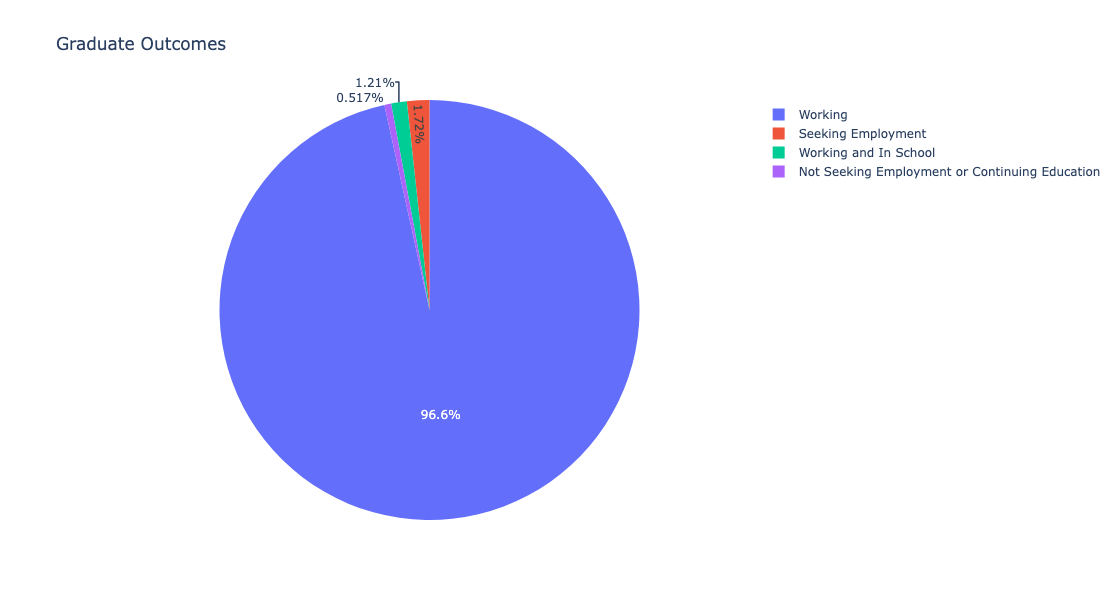

,Outcome,Count,Percent
0,Working,560,96.55%
1,Seeking Employment,10,1.72%
2,Working and In School,7,1.21%
3,Not Seeking Employment or Continuing Education,3,0.52%


In [60]:
outcome_stats(grad_degrees, df)

#### Insights
1. The majority of graduate students started working after graduation.

### Total Outcomes

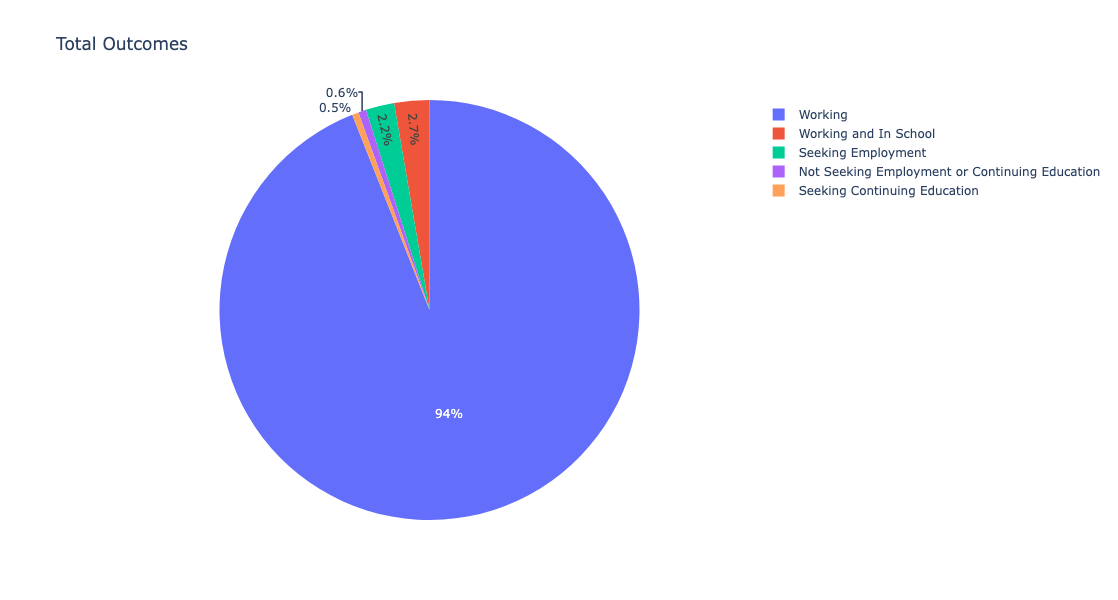

,Outcome,Count,Percent
0,Working,940,94.00%
1,Working and In School,27,2.70%
2,Seeking Employment,22,2.20%
3,Not Seeking Employment or Continuing Education,6,0.60%
4,Seeking Continuing Education,5,0.50%


In [61]:
outcome_stats(['Doctorate','Masters','Advanced Certificate', 'Bachelors'], df)

#### Insights
1. As a majority of both graduate and undergraduate students started working post-grad, it makes sense that this majority is reflected in the total outcomes data.
2. No outcome category besides "Working" meets the minimum sample size of n=30 to be statistically meaningful. As a result, we will focus further analysis on employment. Recommend collecting more data.


## Employment Statistics

#### Find portion of those working who are employed fulltime

In [62]:
ft_portion = len(df[df['Full-time or Part-time'].fillna('').str.contains('Full-time')]['StudentID'])/(len(df['StudentID']))
ft_percent = '{:,.2%}'.format(ft_portion)
print(ft_percent+' of graduates working are employed fulltime.')

87.40% of graduates working are employed fulltime.


#### 87.40% of the total population of 2023 graduates are employed fulltime. We will look at the following stats:

- Average salary by degree level
- Top industries
- Top employers
- Top job titles

### Average Fulltime Salary

##### Boxplot

Check for outliers and compare distribution of salaries by degree level 

In [76]:
# filter df by those working full time
ft_df = df[df['Full-time or Part-time'].fillna('').str.contains('Full-time')]

<Axes: xlabel='Degree Level', ylabel='Annual Salary Amount'>

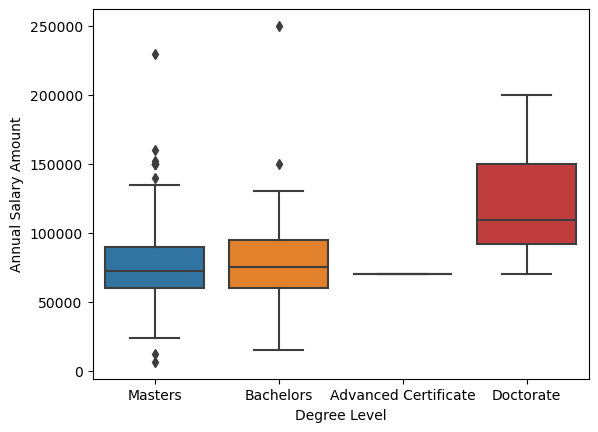

In [77]:
ft_salaries = ft_df[ft_df['Annual Salary Amount'].notnull()]
sns.boxplot(ft_salaries,y='Annual Salary Amount', x='Degree Level')

In [78]:
print('There are '+str(ft_salaries[ft_salaries['Degree Level'] == 'Doctorate'].shape[0]) + ' salary data points for Doctorate degree.')
print('There is '+str(ft_salaries[ft_salaries['Degree Level'] == 'Advanced Certificate'].shape[0]) + ' salary data point for Advanced Certificate degree.')

There are 13 salary data points for Doctorate degree.
There is 1 salary data point for Advanced Certificate degree.


Since there are few data points for salaries of Doctorate and Advanced Certificate grads, we will combine these with masters to look at salary on the graduate student level. 

In [79]:
# define function that finds average salary and allows degree level constraints
def avg_salary(degree: list, df):
    filtered = df[df['Degree Level'].isin(degree)]
    amt = round(filtered['Annual Salary Amount'].mean(),0)
    return amt

##### Undergraduate Fulltime Avg. Salary

In [80]:
# pass undergrad list into function and format to dollar amount
ug_salary = avg_salary(ug_degrees, ft_df)
print('The average salary for 2023 grads with an undergraduate level degree is' + ' ' + '${:,.2f}'.format(ug_salary))

The average salary for 2023 grads with an undergraduate level degree is $78,382.00


##### Graduate Fulltime Avg. Salary

In [81]:
# pass graduate list into function and format to dollar amount
grad_salary = avg_salary(grad_degrees, ft_df)
print('The average salary for 2023 grads with a graduate level degree is' + ' ' + '${:,.2f}'.format(grad_salary))

The average salary for 2023 grads with a graduate level degree is $82,145.00


##### Total Fulltime Avg. Salary

In [82]:
# pass all degree types into function and format to dollar amount
total_salary = avg_salary(['Masters', 'Doctorate', 'Advanced Certificate', 'Bachelors'], ft_df)
print('The average salary for all 2023 grads regardless of degree type is' + ' ' + '${:,.2f}'.format(total_salary))

The average salary for all 2023 grads regardless of degree type is $80,413.00


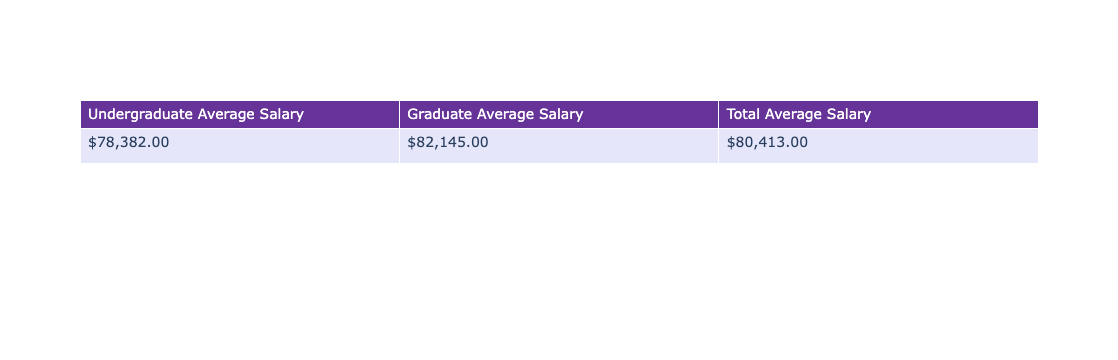

KeyError: "['Level'] not in index"

In [83]:
# create table visualization of salaries
import plotly.graph_objects as go

tblFig = go.Figure(data=[go.Table(header=dict(values=['Undergraduate Average Salary', 'Graduate Average Salary', 'Total Average Salary'], 
                                           align='left',
                                           font=dict(color='white', size=14),
                                           fill_color='rebeccapurple',
                                          ),
                 cells=dict(values=['${:,.2f}'.format(ug_salary), '${:,.2f}'.format(grad_salary),'${:,.2f}'.format(total_salary)], 
                            height=35,
                            align='left', 
                            font=dict(size=14),
                            fill_color='lavender'),)
                     ])
tblFig.update_layout(width=650, height=300)

tblFig.show()

# create barchart showing salaries

# create new col that signifies ug or grad
def grad_level(row):
    if row == 'Bachelors':
        return "Undergraduate"
    else:
        return "Graduate"

ft_salaries_copy = ft_salaries.copy()
ft_salaries_copy['Level'] = ft_salaries_copy['Degree Level'].apply(grad_level)

# group by grad level and calculate average salary
group_salaries = ft_salaries[['Level', 'Annual Salary Amount']].groupby('Level').mean().reset_index().rename(columns={'Annual Salary Amount':'Average Annual Salary Amount'})
group_salaries['x'] = 0

barFig = px.bar(group_salaries, x='Level', y='Average Annual Salary Amount', 
                color='Level',
                color_discrete_map = {
                    'Undergraduate' : 'lightgrey', 'Graduate':'rebeccapurple'},
                title='Average Annual Salary')
barFig.update_layout(width=600, height=600)

barFig.show()

##### Difference in Avg. Fulltime Salary between Graduates and Undergraduates

In [84]:
# calculate difference between two averages
percent_difference = (grad_salary-ug_salary)/((ug_salary+grad_salary)/2)
print('Graduate students have a'+' '+ '{:,.2%}'.format(percent_difference)+ ' higher average salary than Undergraduate students.') 

Graduate students have a 4.69% higher average salary than Undergraduate students.


### Top Industries

In [85]:
# define function that returns head of grouped data with value counts and percentages

def top_table(df, col):
    # group df by industry and aggregate by count to find top industries
    res = df.groupby(col).count()[['StudentID']].rename(columns={'StudentID':'Count'})
    res = res.sort_values(by='Count', ascending=False).reset_index()

    # create column that calculates percent of count
    res['Percent'] = res['Count']/res['Count'].sum()

    # format column to percentage
    res['Percent'] = res['Percent'].map('{:,.2%}'.format)

    # rename count col
    res = res.rename(columns={'Count':'Number of Graduates'})

    # format df to plotly table
    col_list = list(res.columns)
    fig = go.Figure(data=[go.Table(header=dict(values=col_list, 
                                           align='left',
                                           font=dict(color='white', size=14),
                                           fill_color='rebeccapurple',
                                          ),
                 cells=dict(values=[res[col_list[0]], res[col_list[1]], res[col_list[2]]], 
                            height=35,
                            align='left', 
                            font=dict(size=14),
                            fill_color='lavender'),
                                   columnwidth=[195,125,125])
                     ])
    fig.update_layout(width=700, height=600)

    fig.show()

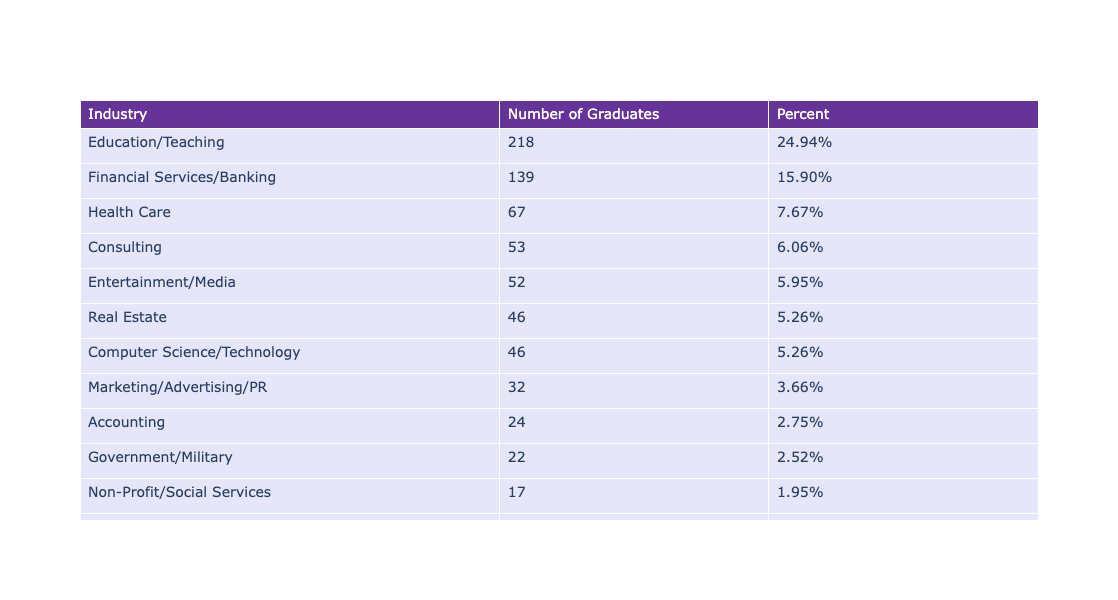

In [72]:
# Use function to find top 5 industries
top_industries = top_table(ft_df, 'Industry')
top_industries

### Top Employers

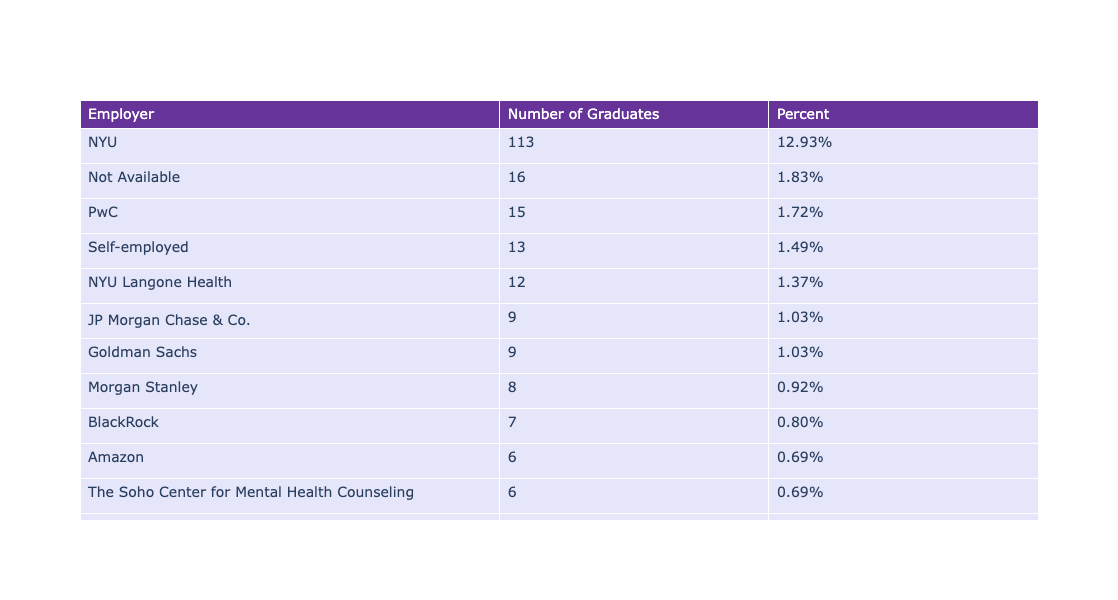

In [73]:
# Use function to find list of top employers
top_employers = top_table(ft_df, 'Employer')
top_employers

### Top Job Titles

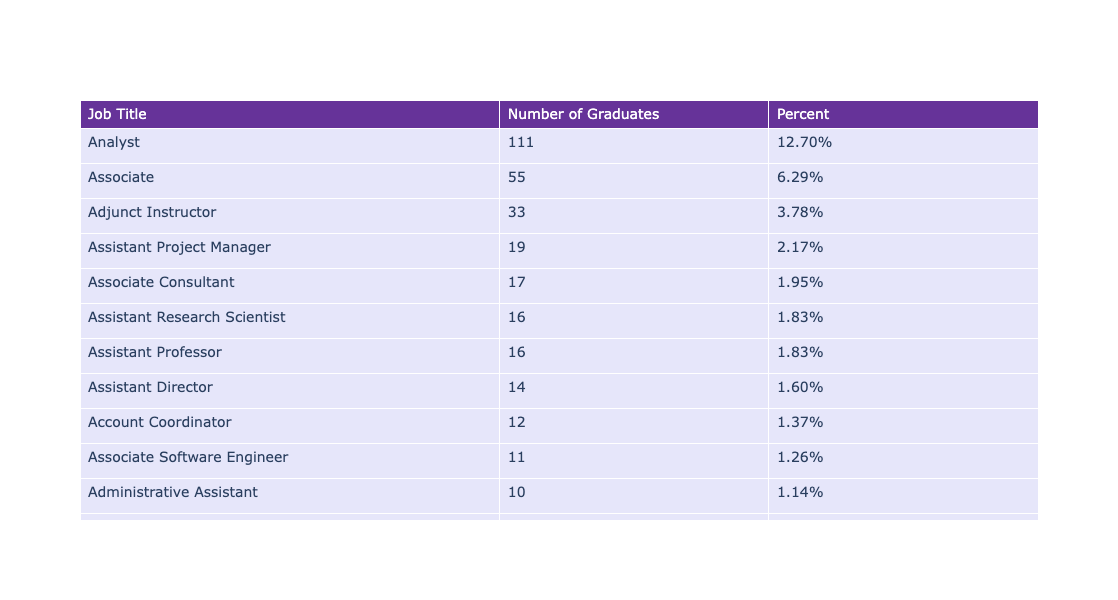

In [74]:
top_titles = top_table(ft_df, 'Job Title')
top_titles

##### Runn tests to ensure data is grouped correct

In [75]:
# test = ft_df.groupby('Industry').count()[['StudentID']].rename(columns={'StudentID':'Count'}).sort_values(by='Count', ascending=False).reset_index()
# test['Count'].sum() == len(ft_df['StudentID'])

# test = ft_df.groupby('Employer').count()[['StudentID']].rename(columns={'StudentID':'Count'}).sort_values(by='Count', ascending=False).reset_index()
# test['Count'].sum() == len(ft_df['StudentID'])

# test = ft_df.groupby('Job Title').count()[['StudentID']].rename(columns={'StudentID':'Count'}).sort_values(by='Count', ascending=False).reset_index()
# test['Count'].sum() == len(ft_df['StudentID'])

## Conclusion
This analysis generated insight into the demographics of the graduating class and what they did after graduation. Given that a large majority of graduates ended up working full time, we examined the characteristics of their employment including average salary, top industries, employers, and job titles. 

If I had more time, I would expand on the data filters and build functions that allow for more custom results such as school. I would also include student engagement metrics and additional employment analysis of time it took for grads to obtain their role and how many offers they received. 